In [19]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score  
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import itertools
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
np.set_printoptions(threshold=np.nan)

pdata = pd.read_csv("../Data/preprocessed_alcoholdata.csv")
pdata = pdata.drop(["Unnamed: 0"], axis=1)
pdata['Conditie'] = pdata['Conditie'].map({'norm': 0,  'bril': 1})
pdata

,TestID,Conditie,SubjectID,SegmentNr,WalkingDirection,SegmentData,Alcohol,Height,Weight,Age,BMI
0,006A01',0,6,1,away,[[array([[0.04697253]]) array([[-0.18321628]])...,0.00,177,70.0,20,22.343516
1,006A01',0,6,2,towards,[[array([[0.40771624]]) array([[-0.22044282]])...,0.00,177,70.0,20,22.343516
2,006A01',0,6,3,away,[[array([[0.09305737]]) array([[-0.19160482]])...,0.00,177,70.0,20,22.343516
3,006A01',0,6,4,towards,[[array([[0.44424376]]) array([[-0.2283845]]) ...,0.00,177,70.0,20,22.343516
4,009A01',0,9,1,away,[[array([[-0.08974021]]) array([[-0.0481508]])...,0.00,195,86.0,23,22.616700
5,009A01',0,9,2,towards,[[array([[0.47497733]]) array([[-0.09702823]])...,0.00,195,86.0,23,22.616700
6,009A01',0,9,3,away,[[array([[0.00489379]]) array([[-0.07232992]])...,0.00,195,86.0,23,22.616700
7,009A01',0,9,4,towards,[[array([[0.51498991]]) array([[-0.09675995]])...,0.00,195,86.0,23,22.616700
8,010A01',0,10,1,away,[[array([[-0.33516738]]) array([[-0.30029692]]...,0.00,165,65.0,28,23.875115
9,010A01',0,10,2,towards,[[array([[0.54318447]]) array([[-0.34777679]])...,0.00,165,65.0,28,23.875115


In [17]:
# adata = pd.read_csv("../Data/preprocessed_alcoholdata_full.csv")
# adata = adata.drop(["Unnamed: 0"], axis=1)
# adata['Conditie'] = adata['Conditie'].map({'norm': 0,  'bril': 1})
# adata['Alcohol'] = adata['Alcohol'].map({'Sober': 0,  'Light': 1, 'Tipsy': 1,  'Drunk': 1})
# # display(adata)

# normdata = pd.read_csv("../Data/preprocessed_alcoholdata_full.csv")
# normdata['Conditie'] = normdata['Conditie'].map({'norm': 0,  'bril': 1})
# normdata = normdata.drop(normdata[normdata["Conditie"] > 0].index)
# normdata['Alcohol'] = normdata['Alcohol'].map({'Sober': 0,  'Light': 1, 'Tipsy': 1,  'Drunk': 1})
# normdata = normdata.drop(normdata[normdata.Alcohol.eq(0)].sample(104).index)
# normdata.groupby('Alcohol').count()

In [35]:
#Splits data into training and validation according to specified ratio
def validation_split(data, ratio):
    sidlist = data['SubjectID'].unique()
    gdata = [data[data['SubjectID']==sid] for sid in sidlist]
    np.random.shuffle(gdata)
    N = len(gdata)
    training = gdata[:int(ratio*N)]
    validation = gdata[(int(ratio*N)):]
    return training,validation

# Converts the arrays in a list to one flattend dataframe
def flatten(data, variable_list):
    return pd.DataFrame(np.vstack(data), columns=variable_list)

def get_split_data(originaldata, variable_list, ratio):
    data = originaldata[variable_list]
    training,validation = validation_split(data, 0.7)
    training = flatten(training, variable_list)
    validation = flatten(validation, variable_list)

    X_train = training.drop(['Alcohol', 'SubjectID'], axis=1)
    y_train = training['Alcohol']
    X_train = X_train.astype(float)
    y_train = y_train.astype(int)
    
    X_test = validation.drop(['Alcohol', 'SubjectID'], axis=1)
    y_test = validation['Alcohol']
    X_test = X_test.astype(float)
    y_test = y_test.astype(int)
    return X_train, X_test, y_train, y_test

collist =  ['SubjectID', 'Alcohol', 'BMI']
X_train, X_test, y_train, y_test = get_split_data(pdata, collist , 0.7)


X_train = np.array(X_train, dtype=float)
y_train = np.array(y_train, dtype=int)

X_test = np.array(X_test, dtype=float)
y_test = np.array(y_test, dtype=int)


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets
model = LinearRegression()
# 2. Use fit
model.fit(X_train, y_train)
# 3. Check the score
model.score(X_test, y_test)


-0.019066289907226253

Coefficients: 
 [0.0170112]
Mean squared error: 0.11
Variance score: 0.00


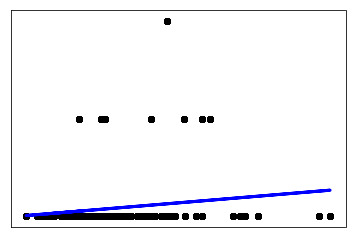

In [36]:


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
  % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs - test data
#plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
#plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

# Plot outputs - training data
plt.scatter(X_train, y_train,  color='black')
plt.plot(X_train, regr.predict(X_train), color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()